C:\Users\ucziesm\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ucziesm\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<Figure size 864x576 with 0 Axes>

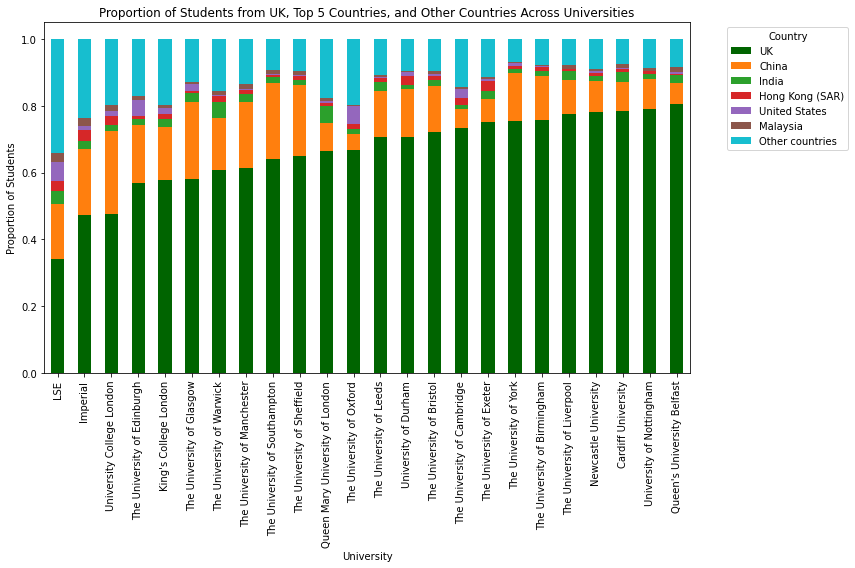

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = 'Students by country.csv'
data = pd.read_csv(file_path)

# Filter for relevant columns
filtered_data = data[['HE Provider', 'Country', 'Headcount']]

# Shorten university names for space
def shorten_university_name(name):
    if 'Imperial' in name:
        return 'Imperial'
    elif 'London School of Economics' in name:
        return 'LSE'
    else:
        return name

# Shorten country names for space
def shorten_country_name(name):
    if 'Hong Kong' in name:
        return 'Hong Kong (SAR)'
    else:
        return name

filtered_data['HE Provider'] = filtered_data['HE Provider'].apply(shorten_university_name)
filtered_data['Country'] = filtered_data['Country'].apply(shorten_country_name)

# calculate *total* headcounts by country usig groupby
country_totals = filtered_data.groupby('Country')['Headcount'].sum().sort_values(ascending=False)

# Identify top 10 countries excluding the UK
top_5_countries = country_totals[country_totals.index != 'UK'].head(5).index.tolist()

# Create a new df for visualisation, using lambda
viz_data = filtered_data.copy()
viz_data['Country'] = viz_data['Country'].apply(lambda x: x if x == 'UK' or x in top_5_countries else 'Other countries')

# Calculate proportions of students - note unstack
viz_data_grouped = viz_data.groupby(['HE Provider', 'Country'])['Headcount'].sum().unstack().fillna(0)
university_totals = viz_data_grouped.sum(axis=1)
viz_data_grouped = viz_data_grouped.div(university_totals, axis=0)

# Ensure the columns are ordered with 'UK' at the TOP
viz_data_grouped = viz_data_grouped[['UK'] + top_5_countries + ['Other countries']]

# Sort universities based on proportion of non -UK students
non_uk_proportions = viz_data_grouped[top_5_countries + ['Other countries']].sum(axis=1)
sorted_universities = non_uk_proportions.sort_values(ascending=False).index
viz_data_grouped = viz_data_grouped.loc[sorted_universities]

# Define color scheme with UK as dark green - hex values
colors = ['#006400', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf']

# Plot the proportions in stacked bar chart
plt.figure(figsize=(12, 8))
viz_data_grouped.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Proportion of Students from UK, Top 5 Countries, and Other Countries Across Universities')
plt.xlabel('University')
plt.ylabel('Proportion of Students')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
